In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime


path=r"C:\Users\praya\Documents\Project EIL\AL.csv"
data=pd.read_csv(path,parse_dates=[0],infer_datetime_format= True, dayfirst=True,)

In [3]:
data

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE
0,M187,64.0,730.0,ITEM1,21-02-02,0,Years
1,M187,1712.0,869.0,ITEM1,12-04-02,0,Years
2,I036,397.0,742.0,ITEM1,11-12-02,0,Years
3,I036,52.0,742.0,ITEM1,13-02-03,0,Years
4,I036,680.0,763.0,ITEM1,25-11-02,0,Years
...,...,...,...,...,...,...,...
146,M187,789.0,1950.0,ITEM1,05-06-20,5,Months
147,M187,242.0,2201.0,ITEM1,05-06-20,2,Months
148,M187,222.0,1950.0,ITEM1,05-06-20,5,Months
149,M187,893.0,2063.0,ITEM1,12-04-21,6,Months


In [4]:
data = data[(data[['ORDER_QTY','DELIVERY_PERIOD']] != 0).all(axis=1)]

In [5]:
data

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE
6,P678,1028.0,18.93,ITEM1,09-12-04,4,Months
7,M187,146.0,1136.00,ITEM1,16-01-05,2,Months
9,M187,107.0,717.00,ITEM1,15-06-03,3,Months
10,M187,59.0,1495.00,ITEM1,14-06-04,3,Months
11,P678,1948.0,12.58,ITEM1,16-02-04,4,Months
...,...,...,...,...,...,...,...
146,M187,789.0,1950.00,ITEM1,05-06-20,5,Months
147,M187,242.0,2201.00,ITEM1,05-06-20,2,Months
148,M187,222.0,1950.00,ITEM1,05-06-20,5,Months
149,M187,893.0,2063.00,ITEM1,12-04-21,6,Months


In [6]:
data['ORDER DATE'] = pd.to_datetime(data['ORDER DATE'], format='%d-%m-%y')


C:\Users\praya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
data=data.sort_values(by='ORDER DATE')

In [8]:
data.reset_index(inplace=True)

In [9]:
data.drop(['index'],inplace=True,axis=1)

In [10]:
data

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE
0,M187,107.0,717.00,ITEM1,2003-06-15,3,Months
1,P678,1948.0,12.58,ITEM1,2004-02-16,4,Months
2,M187,127.0,911.40,ITEM1,2004-04-03,5,Months
3,M187,373.0,911.40,ITEM1,2004-04-03,5,Months
4,M187,59.0,1495.00,ITEM1,2004-06-14,3,Months
...,...,...,...,...,...,...,...
137,M187,789.0,1950.00,ITEM1,2020-06-05,5,Months
138,M187,242.0,2201.00,ITEM1,2020-06-05,2,Months
139,M187,222.0,1950.00,ITEM1,2020-06-05,5,Months
140,J110,368.0,945.00,ITEM1,2021-02-25,6,Months


In [11]:
data['TOTAL PRICE']=data['ORDER_QTY']*data['UNIT_PRICE']

In [12]:
data['ORDER DATE YR'] = data['ORDER DATE'].dt.year

In [13]:
data['VENDOR_CODE'].nunique()

33

In [14]:
data['VENDOR_CODE'].value_counts().nlargest(1)

M187    52
Name: VENDOR_CODE, dtype: int64

In [15]:
max=data['TOTAL PRICE'].idxmax()

In [16]:
data[120:121]

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE,TOTAL PRICE,ORDER DATE YR
120,J110B,1754.0,2063.0,ITEM1,2018-11-13,6,Months,3618502.0,2018


In [17]:
min=data['TOTAL PRICE'].idxmin()

In [18]:
data[133:134]

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE,TOTAL PRICE,ORDER DATE YR
133,G616,6.0,1.0,ITEM1,2019-10-24,3,Months,6.0,2019


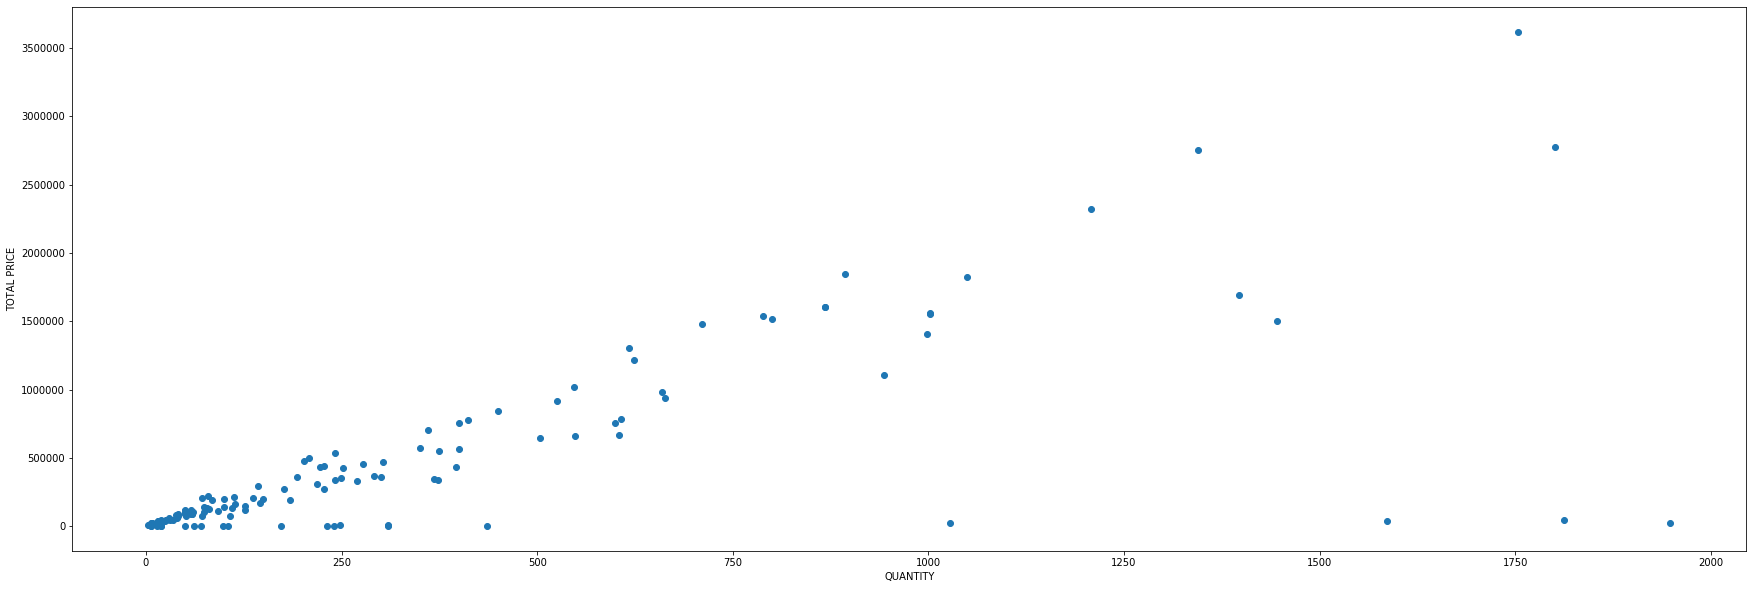

In [19]:
#DATA VISUALISATION
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(30,10))
plt.ylabel("TOTAL PRICE")
plt.xlabel("QUANTITY")
plt.scatter(data['ORDER_QTY'],data['TOTAL PRICE'])

<BarContainer object of 142 artists>

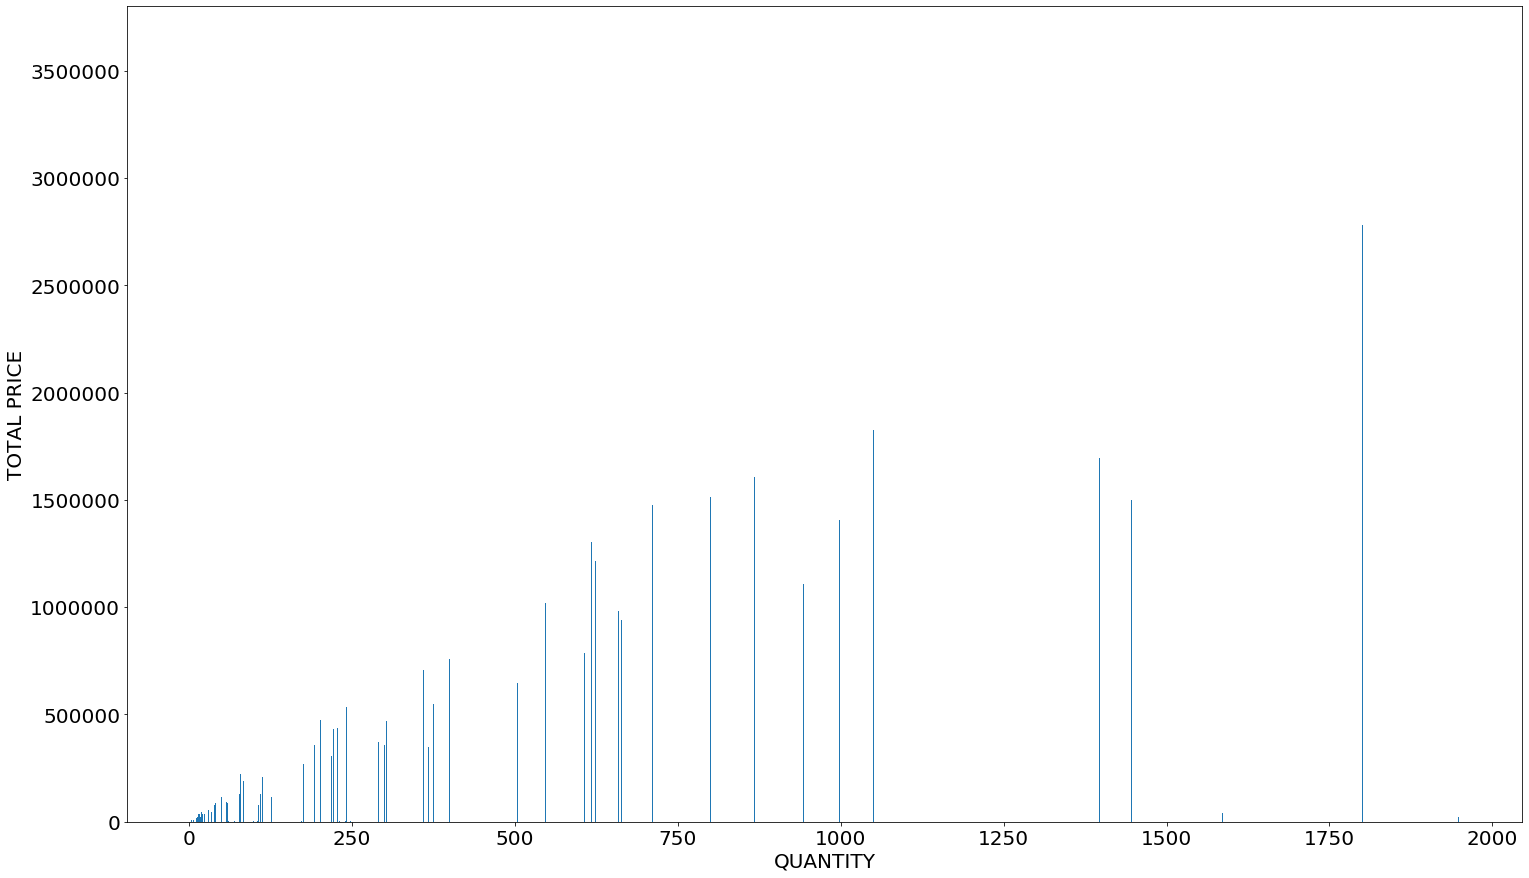

In [20]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(25,15))
plt.ylabel("TOTAL PRICE")
plt.xlabel("QUANTITY")
plt.bar(data['ORDER_QTY'],data['TOTAL PRICE'])

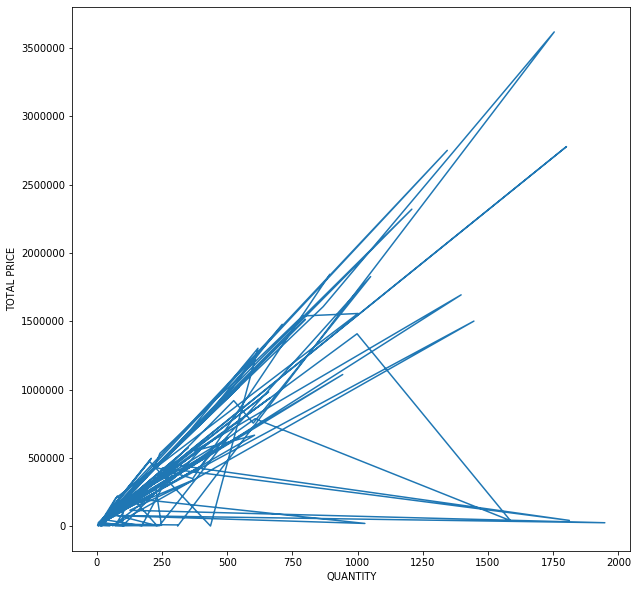

In [21]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,10))
plt.ylabel("TOTAL PRICE")
plt.xlabel("QUANTITY")
plt.plot(data['ORDER_QTY'],data['TOTAL PRICE'])

In [22]:
data['ORDER DATE'].value_counts().nlargest(1)

2020-06-05    5
Name: ORDER DATE, dtype: int64

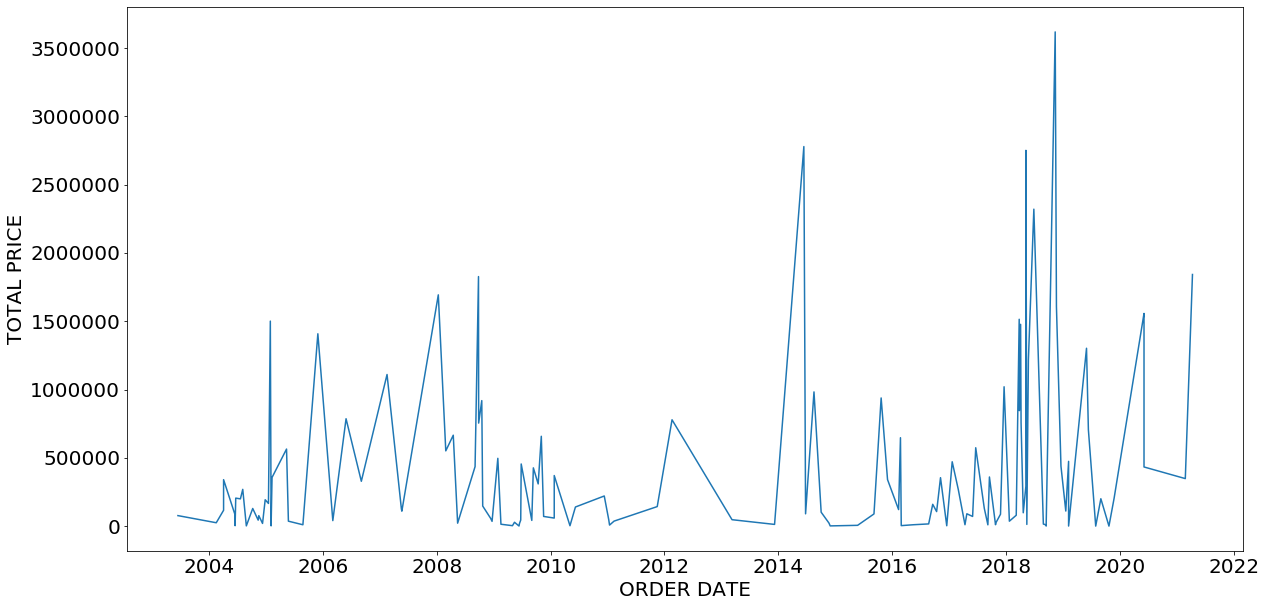

In [23]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
plt.ylabel("TOTAL PRICE")
plt.xlabel("ORDER DATE")
plt.plot(data['ORDER DATE'],data['TOTAL PRICE'])

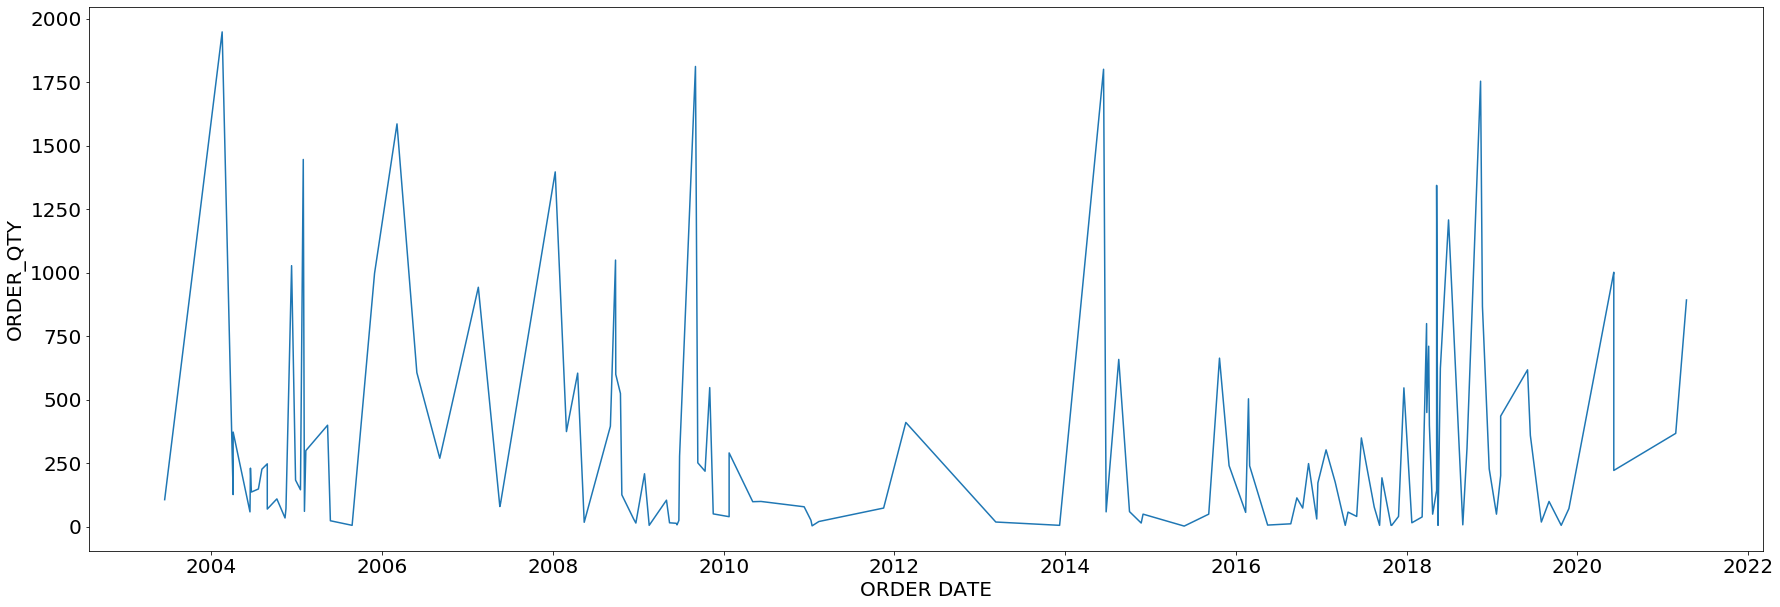

In [24]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(30,10))
plt.ylabel("ORDER_QTY")
plt.xlabel("ORDER DATE")
plt.plot(data['ORDER DATE'],data['ORDER_QTY'])

In [25]:
data

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE,TOTAL PRICE,ORDER DATE YR
0,M187,107.0,717.00,ITEM1,2003-06-15,3,Months,76719.00,2003
1,P678,1948.0,12.58,ITEM1,2004-02-16,4,Months,24505.84,2004
2,M187,127.0,911.40,ITEM1,2004-04-03,5,Months,115747.80,2004
3,M187,373.0,911.40,ITEM1,2004-04-03,5,Months,339952.20,2004
4,M187,59.0,1495.00,ITEM1,2004-06-14,3,Months,88205.00,2004
...,...,...,...,...,...,...,...,...,...
137,M187,789.0,1950.00,ITEM1,2020-06-05,5,Months,1538550.00,2020
138,M187,242.0,2201.00,ITEM1,2020-06-05,2,Months,532642.00,2020
139,M187,222.0,1950.00,ITEM1,2020-06-05,5,Months,432900.00,2020
140,J110,368.0,945.00,ITEM1,2021-02-25,6,Months,347760.00,2021


In [75]:
#linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=data.iloc[:,8]
y=data.iloc[:,2]  #[:,7]--for total price prediction


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=1)


In [77]:
X_train.values.reshape(-1,1).shape  , y_train.shape

((94, 1), (94,))

In [78]:
X_test.values.reshape(-1,1).shape  , y_test.shape

((48, 1), (48,))

In [79]:
simplelinearRegression=LinearRegression()
simplelinearRegression.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
y_predict=simplelinearRegression.predict(X_test.values.reshape(-1,1))
print(y_predict)

[1504.08374027 1581.06947439 1196.14080381 1042.16933557 1619.56234145
 1234.63367086 1042.16933557 1234.63367086 1465.59087322 1542.57660733
 1619.56234145 1234.63367086 1504.08374027 1542.57660733 1157.64793675
 1080.66220263 1196.14080381 1542.57660733 1504.08374027 1080.66220263
 1196.14080381 1542.57660733 1581.06947439 1542.57660733 1273.12653792
 1234.63367086 1196.14080381 1542.57660733 1427.09800616 1542.57660733
 1080.66220263 1157.64793675 1388.6051391  1581.06947439 1581.06947439
 1388.6051391  1080.66220263 1042.16933557 1581.06947439 1196.14080381
 1196.14080381 1581.06947439 1619.56234145 1234.63367086 1234.63367086
 1465.59087322 1504.08374027 1619.56234145]


In [81]:
x_new=np.array([[2022,2023,2024,2025,2026]])
y_predict_val=simplelinearRegression.predict(x_new.reshape(-1,1))

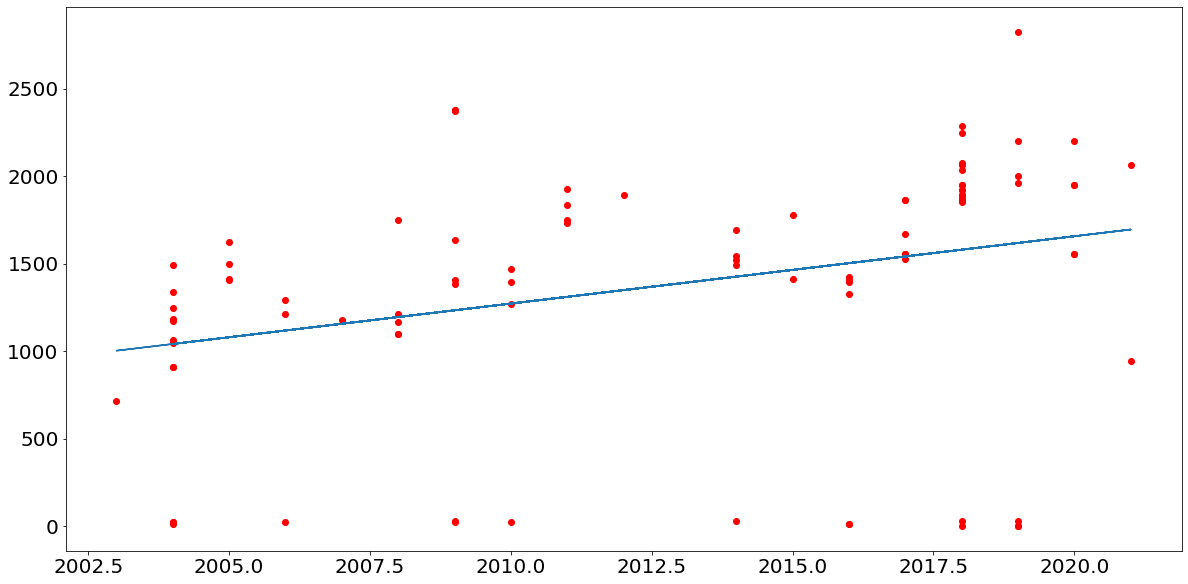

In [86]:
plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,simplelinearRegression.predict(X_train.values.reshape(-1,1)))


2022 - Rs 1735.04
2023 - Rs 1773.53
2024 - Rs 1812.03
2025 - Rs 1850.52
2026 - Rs 1889.01


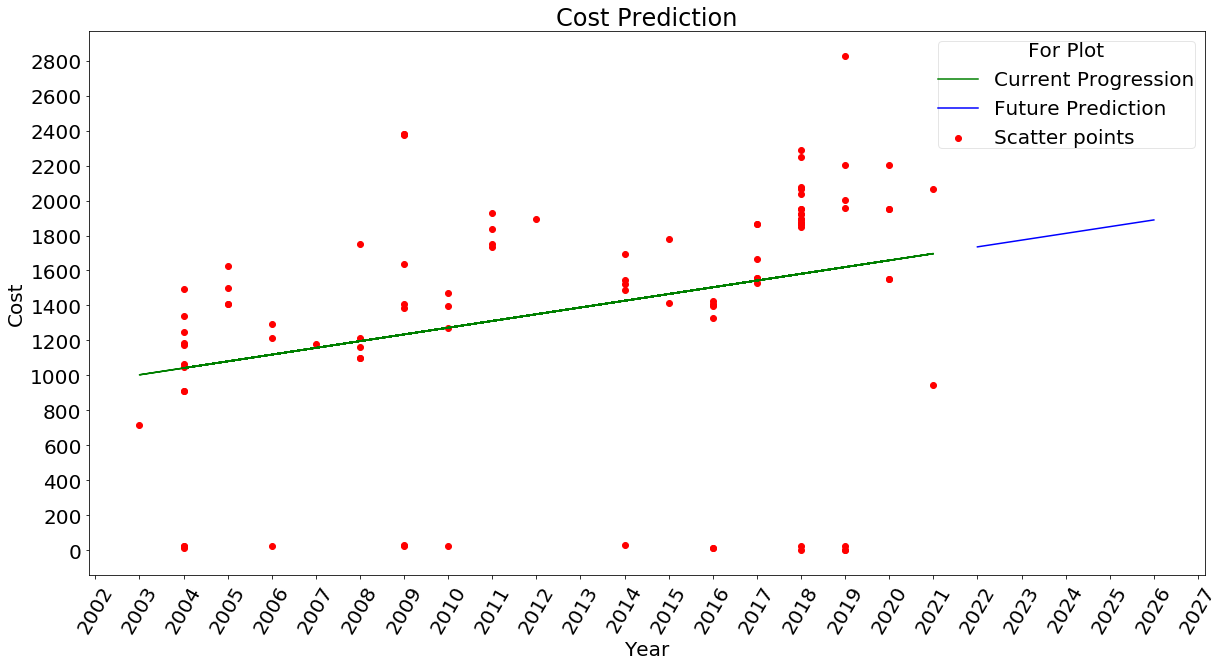

In [83]:
ax=plt.figure(figsize=(20,10))
a1=plt.scatter(X_train,y_train,color='red')
a2=plt.plot(X_train,simplelinearRegression.predict(X_train.values.reshape(-1,1)),color='green')
a3=plt.plot(x_new.reshape(-1,1),simplelinearRegression.predict(x_new.reshape(-1,1)),color='blue')
plt.legend(['Current Progression', 'Future Prediction', 'Scatter points'],frameon=True,framealpha=0.5,ncol=1,shadow=False,borderpad=0.01,title='For Plot')
plt.xlabel("Year")
plt.xticks(rotation=60)
plt.ylabel("Cost")
plt.title("Cost Prediction")
plt.locator_params(axis="x", nbins=30)
plt.locator_params(axis="y", nbins=18)
for i in range(0,5):
    print(2020+i+2,"-","Rs",round(y_predict_val[i],2))

In [33]:
data

,VENDOR_CODE,ORDER_QTY,UNIT_PRICE,ITEM_CODE,ORDER DATE,DELIVERY_PERIOD,DP_TYPE,TOTAL PRICE,ORDER DATE YR
0,M187,107.0,717.00,ITEM1,2003-06-15,3,Months,76719.00,2003
1,P678,1948.0,12.58,ITEM1,2004-02-16,4,Months,24505.84,2004
2,M187,127.0,911.40,ITEM1,2004-04-03,5,Months,115747.80,2004
3,M187,373.0,911.40,ITEM1,2004-04-03,5,Months,339952.20,2004
4,M187,59.0,1495.00,ITEM1,2004-06-14,3,Months,88205.00,2004
...,...,...,...,...,...,...,...,...,...
137,M187,789.0,1950.00,ITEM1,2020-06-05,5,Months,1538550.00,2020
138,M187,242.0,2201.00,ITEM1,2020-06-05,2,Months,532642.00,2020
139,M187,222.0,1950.00,ITEM1,2020-06-05,5,Months,432900.00,2020
140,J110,368.0,945.00,ITEM1,2021-02-25,6,Months,347760.00,2021


In [34]:
data['VENDOR_CODE'].value_counts()

M187     52
J110B    27
E214      7
G616      6
P678      5
I036      4
T040      4
H187      4
80121     3
~1264     2
K648      2
J110      2
I181      2
~0015     2
P686      2
3743      1
~0032     1
~0131     1
81508     1
O035      1
H663      1
~0765     1
I594      1
T696      1
C727      1
H086      1
I598      1
~1668     1
~0206     1
80403     1
~0016     1
80407     1
J110A     1
Name: VENDOR_CODE, dtype: int64

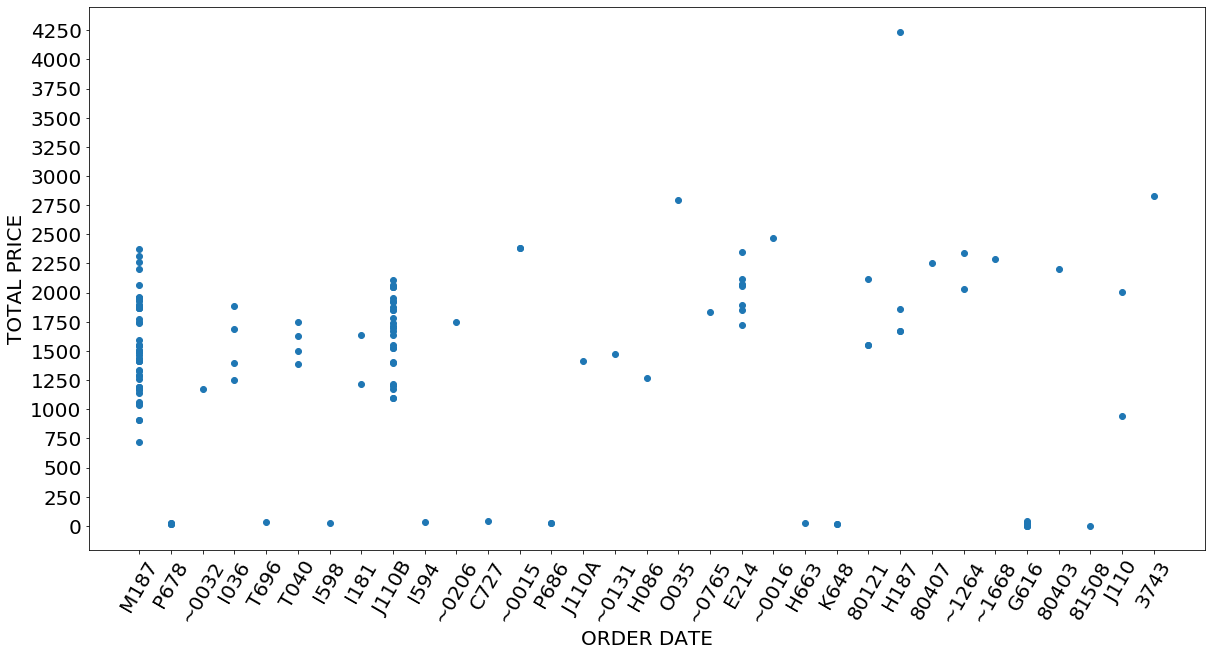

In [35]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
plt.locator_params(axis="y", nbins=20)
plt.ylabel("TOTAL PRICE")
plt.xlabel("ORDER DATE")
plt.scatter(data['VENDOR_CODE'],data['UNIT_PRICE'])


In [36]:
#Naive Bayes
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
order_encoder=le.fit_transform(data['UNIT_PRICE'])
print(order_encoder)

[ 14   1  15  15  50   1  51  37  26   4   4  24  31  19   3  18  22  17
  11  27  42  52  60  43   6  35  30  25  59  27  29  47  21  27  20  70
  32  71  23  80 103 106 101  10  71  12 107 107  72  61   5  65  42  28
  38  48  33   7  39 109  71  74  69  85  82 108  92  56  54  49  66  49
   9  76  73  44  44  97  34   2  41  36  40  46  45  53   2  58  55  63
  63  58  68  62  64  57  77  67 111  96  78 100  89  81  79  94  81  86
  91  90 102  91  86  83  78 104  78  78   8   0  93  75  75  84  99 105
   0  95  87   8   0  88  13   0 110  57  57  86  98  86  16  93]


In [37]:
label=le.fit_transform(data['ORDER DATE YR'])
print(label)

[ 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  4  4  4  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  7  7  7  7  8  8  8  8  9 10 10 11 11 11 11 11
 11 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 18 18]


In [38]:
from sklearn.model_selection import train_test_split
NX_train,NX_test,ny_train,ny_test=train_test_split(order_encoder,label,test_size=0.50)
NX=NX_train.reshape(-1,1)

In [63]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(NX,ny_train)
ny_pred=model.predict(NX_test.reshape(-1,1))
print(ny_pred)

[14 11  6  1  5 14 15 11  1  1  1 15  5 15 15 15  7  5 14  1  1  1  1  6
  8  1 15 15 15  1 15 11 11  1 15 15  1  6 15 15  1  1  6 15 15  1 11 14
 11  1  1 15 11 11  1  1  8  8  1 15 15 11  1 14 15  1 15 15  1  6  1]


In [64]:
from sklearn import metrics
accuracy=metrics.accuracy_score(ny_test,ny_pred)
print('Accuracy: {0}%'.format(accuracy*100))
#nb_test.append((accuracy*100))

Accuracy: 30.985915492957744%
